In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import RFECV
from sklearn.tree import plot_tree, export_graphviz
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# 1. Base de dados com contações após 1, 2, 3, 4 e 5 anos

In [2]:
df = pd.read_csv('Datasets/transformation_disc_result_SD.csv')

In [3]:
df = shuffle(df)

In [4]:
x = df.drop('Open_dif_disc', axis=1)
y = df['Open_dif_disc']

## 1. Seleção dos atributos mais significativos (no mínimo 5)

In [5]:
rfecv = RFECV(DecisionTreeClassifier(max_depth=5), min_features_to_select=5, cv=5)

In [6]:
x_r = rfecv.fit_transform(x,y)

c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


## 2. Aplicação de validação cruzada

In [7]:
cv_result = cross_validate(DecisionTreeClassifier(), x, y, scoring='accuracy', cv=5)

In [8]:
cv_result

{'fit_time': array([0.77903533, 0.75298572, 0.70999074, 0.74099994, 0.76299024]),
 'score_time': array([0.00700164, 0.00701451, 0.00700021, 0.00801587, 0.00797081]),
 'test_score': array([0.97262745, 0.97639216, 0.9747451 , 0.972     , 0.9757628 ])}

## 3. Execução individual

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [10]:
tree = DecisionTreeClassifier()

In [11]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [12]:
y_pred = tree.predict(x_test)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      4794
         1.0       0.96      0.96      0.96      4806
         2.0       0.96      0.95      0.95      4823
         3.0       0.97      0.98      0.98      4702

    accuracy                           0.97     19125
   macro avg       0.97      0.97      0.97     19125
weighted avg       0.97      0.97      0.97     19125



In [14]:
matrix = confusion_matrix(y_test, y_pred)
print("0 | {}".format(matrix[0]))
print("1 | {}".format(matrix[1]))
print("2 | {}".format(matrix[2]))
print("3 | {}".format(matrix[3]))

0 | [4726   30   30    8]
1 | [  41 4591  130   44]
2 | [  23  141 4563   96]
3 | [  13   17   51 4621]


In [15]:
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [16]:
print("YEAR 1")
one_year = x_test[x_test['years_dif'] == 1].index.values
print(classification_report(y_test[one_year], y_pred[one_year]))

print("YEAR 2")
two_years = x_test[x_test['years_dif'] == 2].index.values
print(classification_report(y_test[two_years], y_pred[two_years]))

print("YEAR 3")
three_years = x_test[x_test['years_dif'] == 3].index.values
print(classification_report(y_test[three_years], y_pred[three_years]))

print("YEAR 4")
four_years = x_test[x_test['years_dif'] == 4].index.values
print(classification_report(y_test[four_years], y_pred[four_years]))

print("YEAR 5")
five_years = x_test[x_test['years_dif'] == 5].index.values
print(classification_report(y_test[five_years], y_pred[five_years]))

YEAR 1
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      1251
         1.0       0.93      0.93      0.93      1817
         2.0       0.89      0.89      0.89      1162
         3.0       0.86      0.93      0.90       373

    accuracy                           0.93      4603
   macro avg       0.91      0.93      0.92      4603
weighted avg       0.93      0.93      0.93      4603

YEAR 2
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1242
         1.0       0.94      0.94      0.94      1103
         2.0       0.94      0.91      0.93      1255
         3.0       0.91      0.94      0.92       779

    accuracy                           0.94      4379
   macro avg       0.94      0.94      0.94      4379
weighted avg       0.94      0.94      0.94      4379

YEAR 3
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       976


## 4. Novamente a execução do treinamento com árvore de decisão
Após a execução, uma visualização gráfica da árvore é gerada.

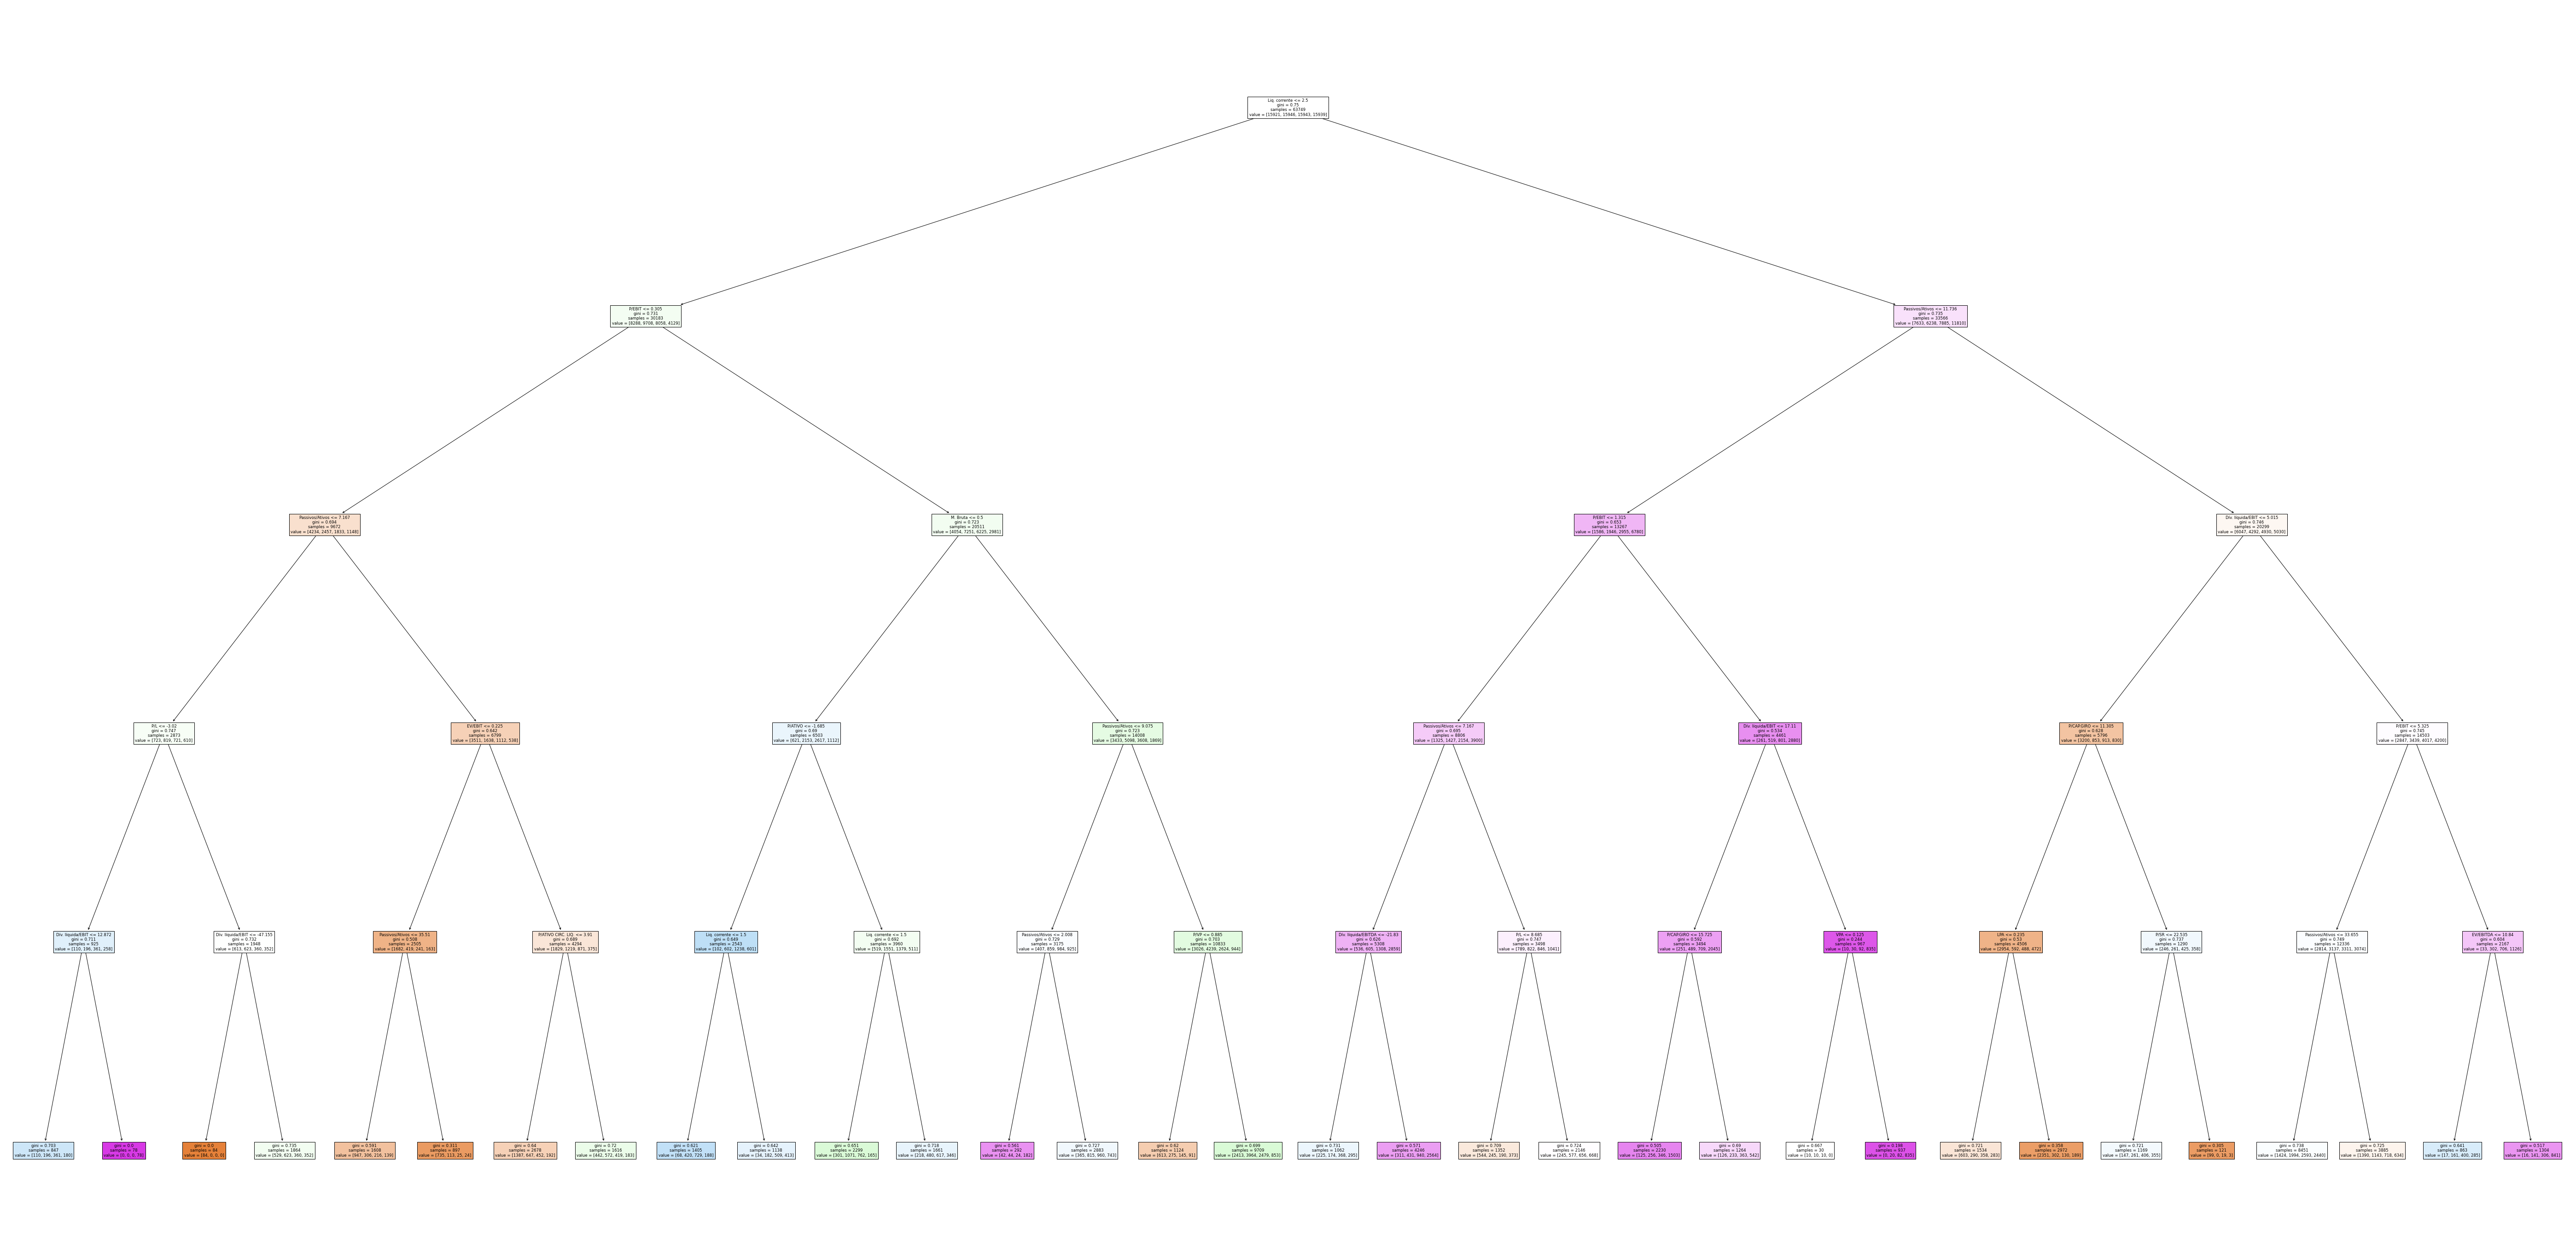

In [17]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(x_r,y)

fig = plt.figure(figsize=(100,50))
_ = plot_tree(tree, 
                   feature_names=x.columns,  
                   filled=True)
plt.savefig("Trees\\tree.jpeg", bbox_inches='tight')

# 2. Toda a rotina é repetida para as demais base de dados

In [18]:
dfs = [shuffle(pd.read_csv('Datasets/transformation_disc_result_1_year_SD.csv')),
       shuffle(pd.read_csv('Datasets/transformation_disc_result_2_year_SD.csv')),
       shuffle(pd.read_csv('Datasets/transformation_disc_result_3_year_SD.csv')),
       shuffle(pd.read_csv('Datasets/transformation_disc_result_4_year_SD.csv')),
       shuffle(pd.read_csv('Datasets/transformation_disc_result_5_year_SD.csv'))]

c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


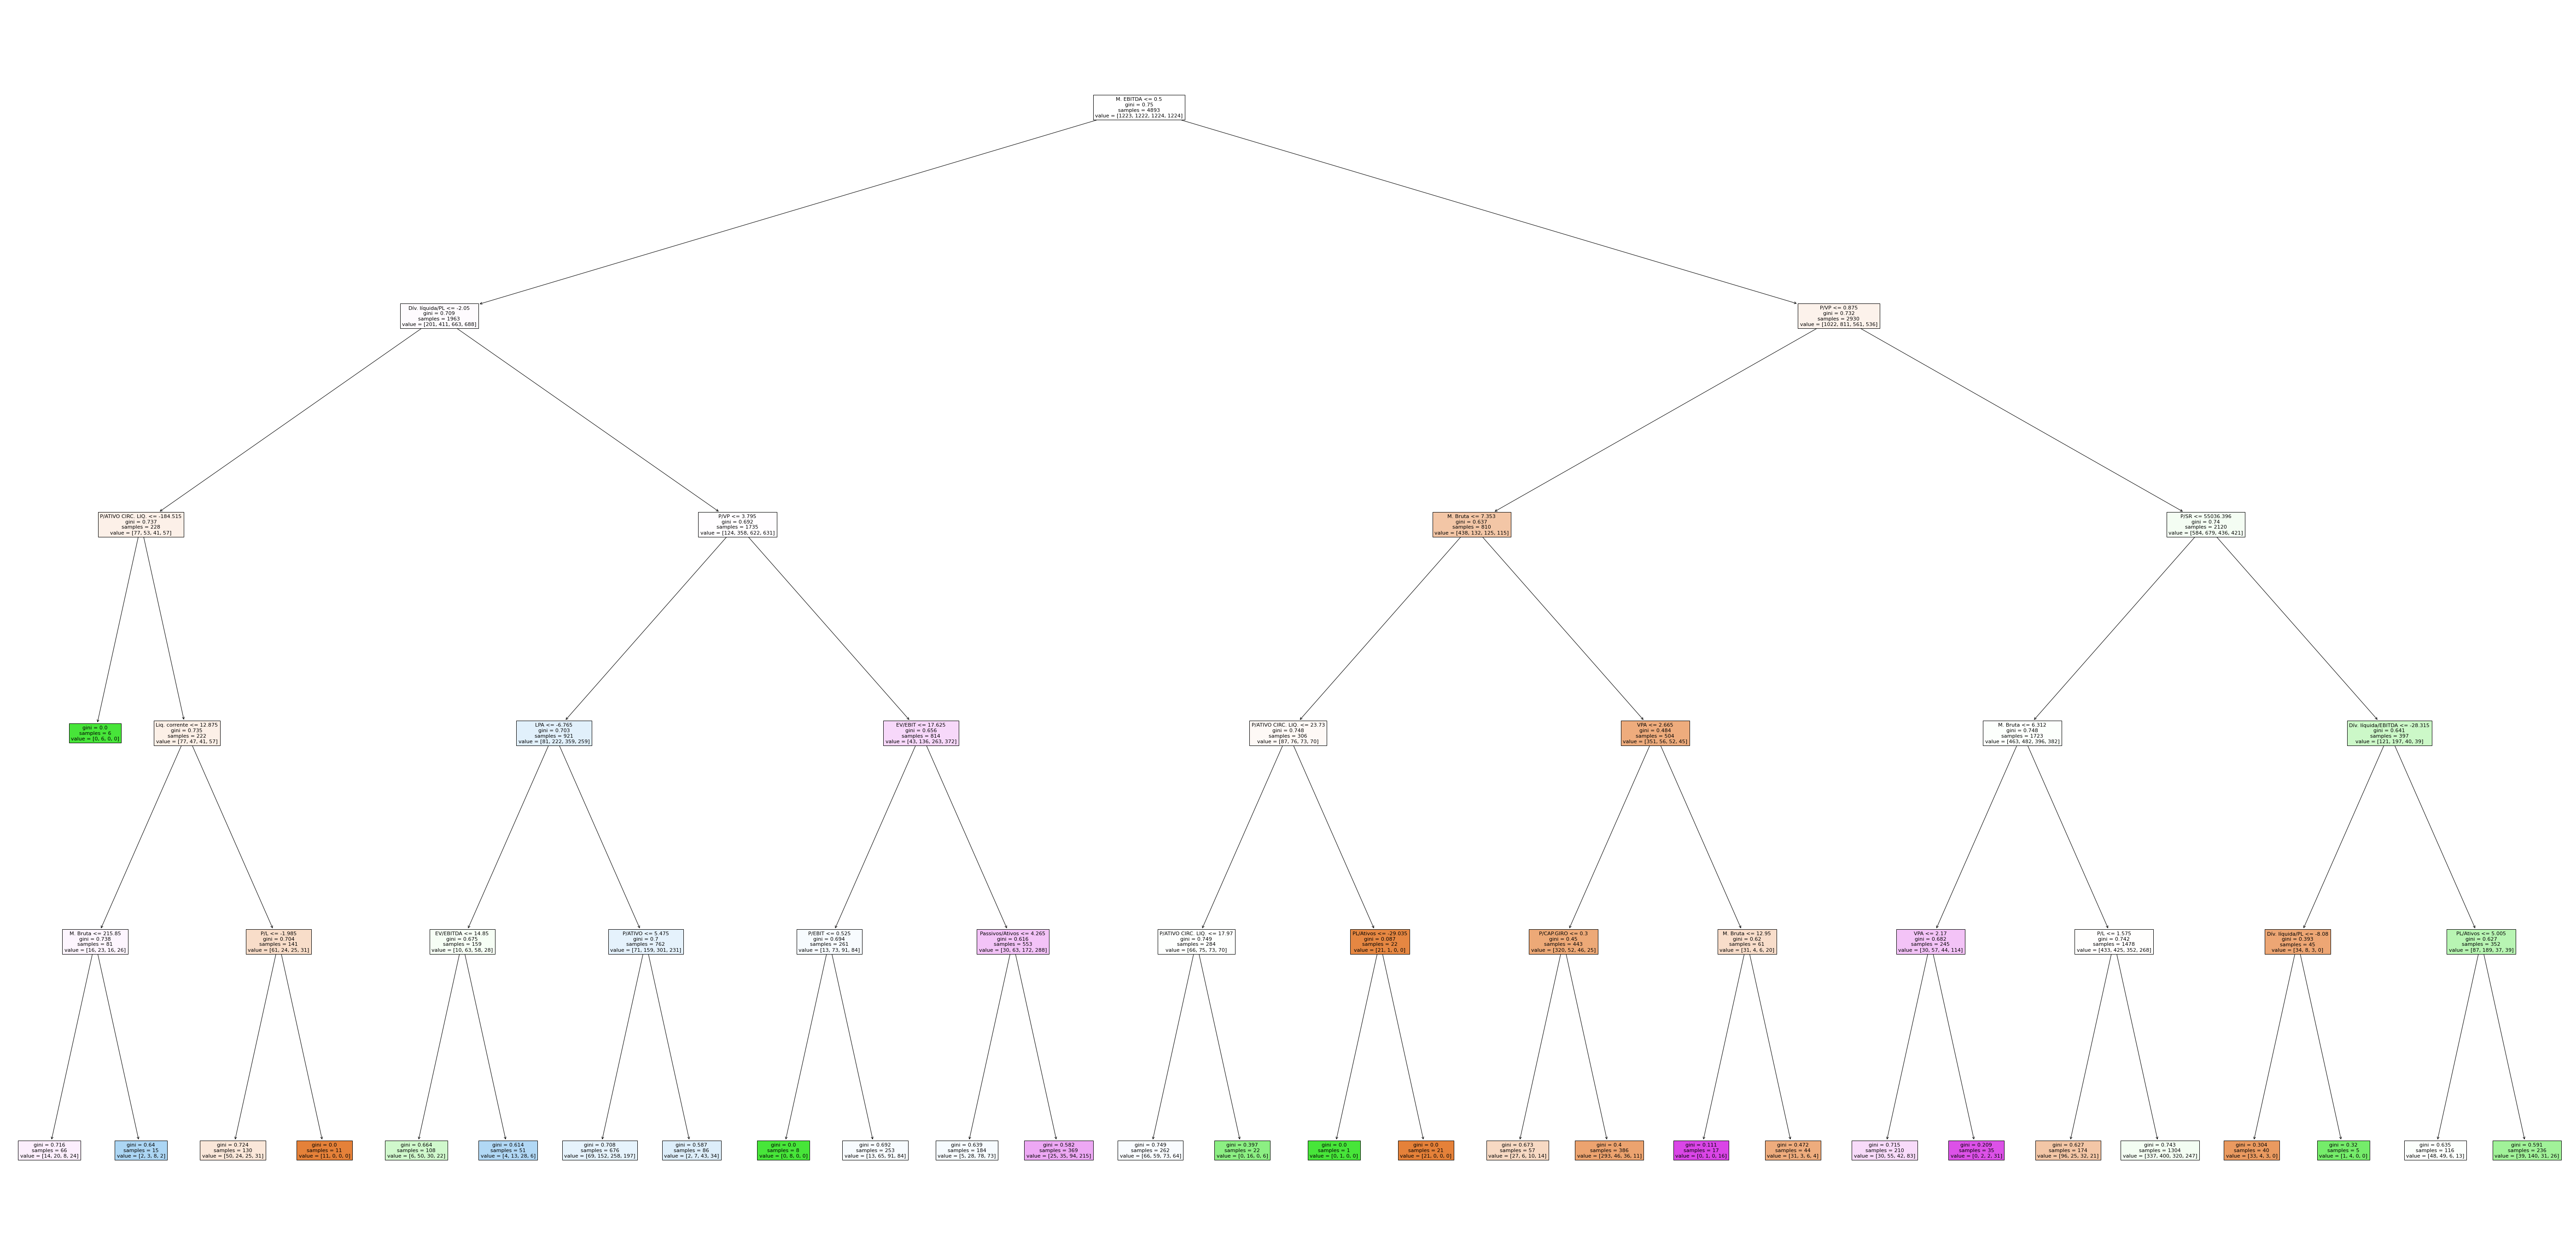

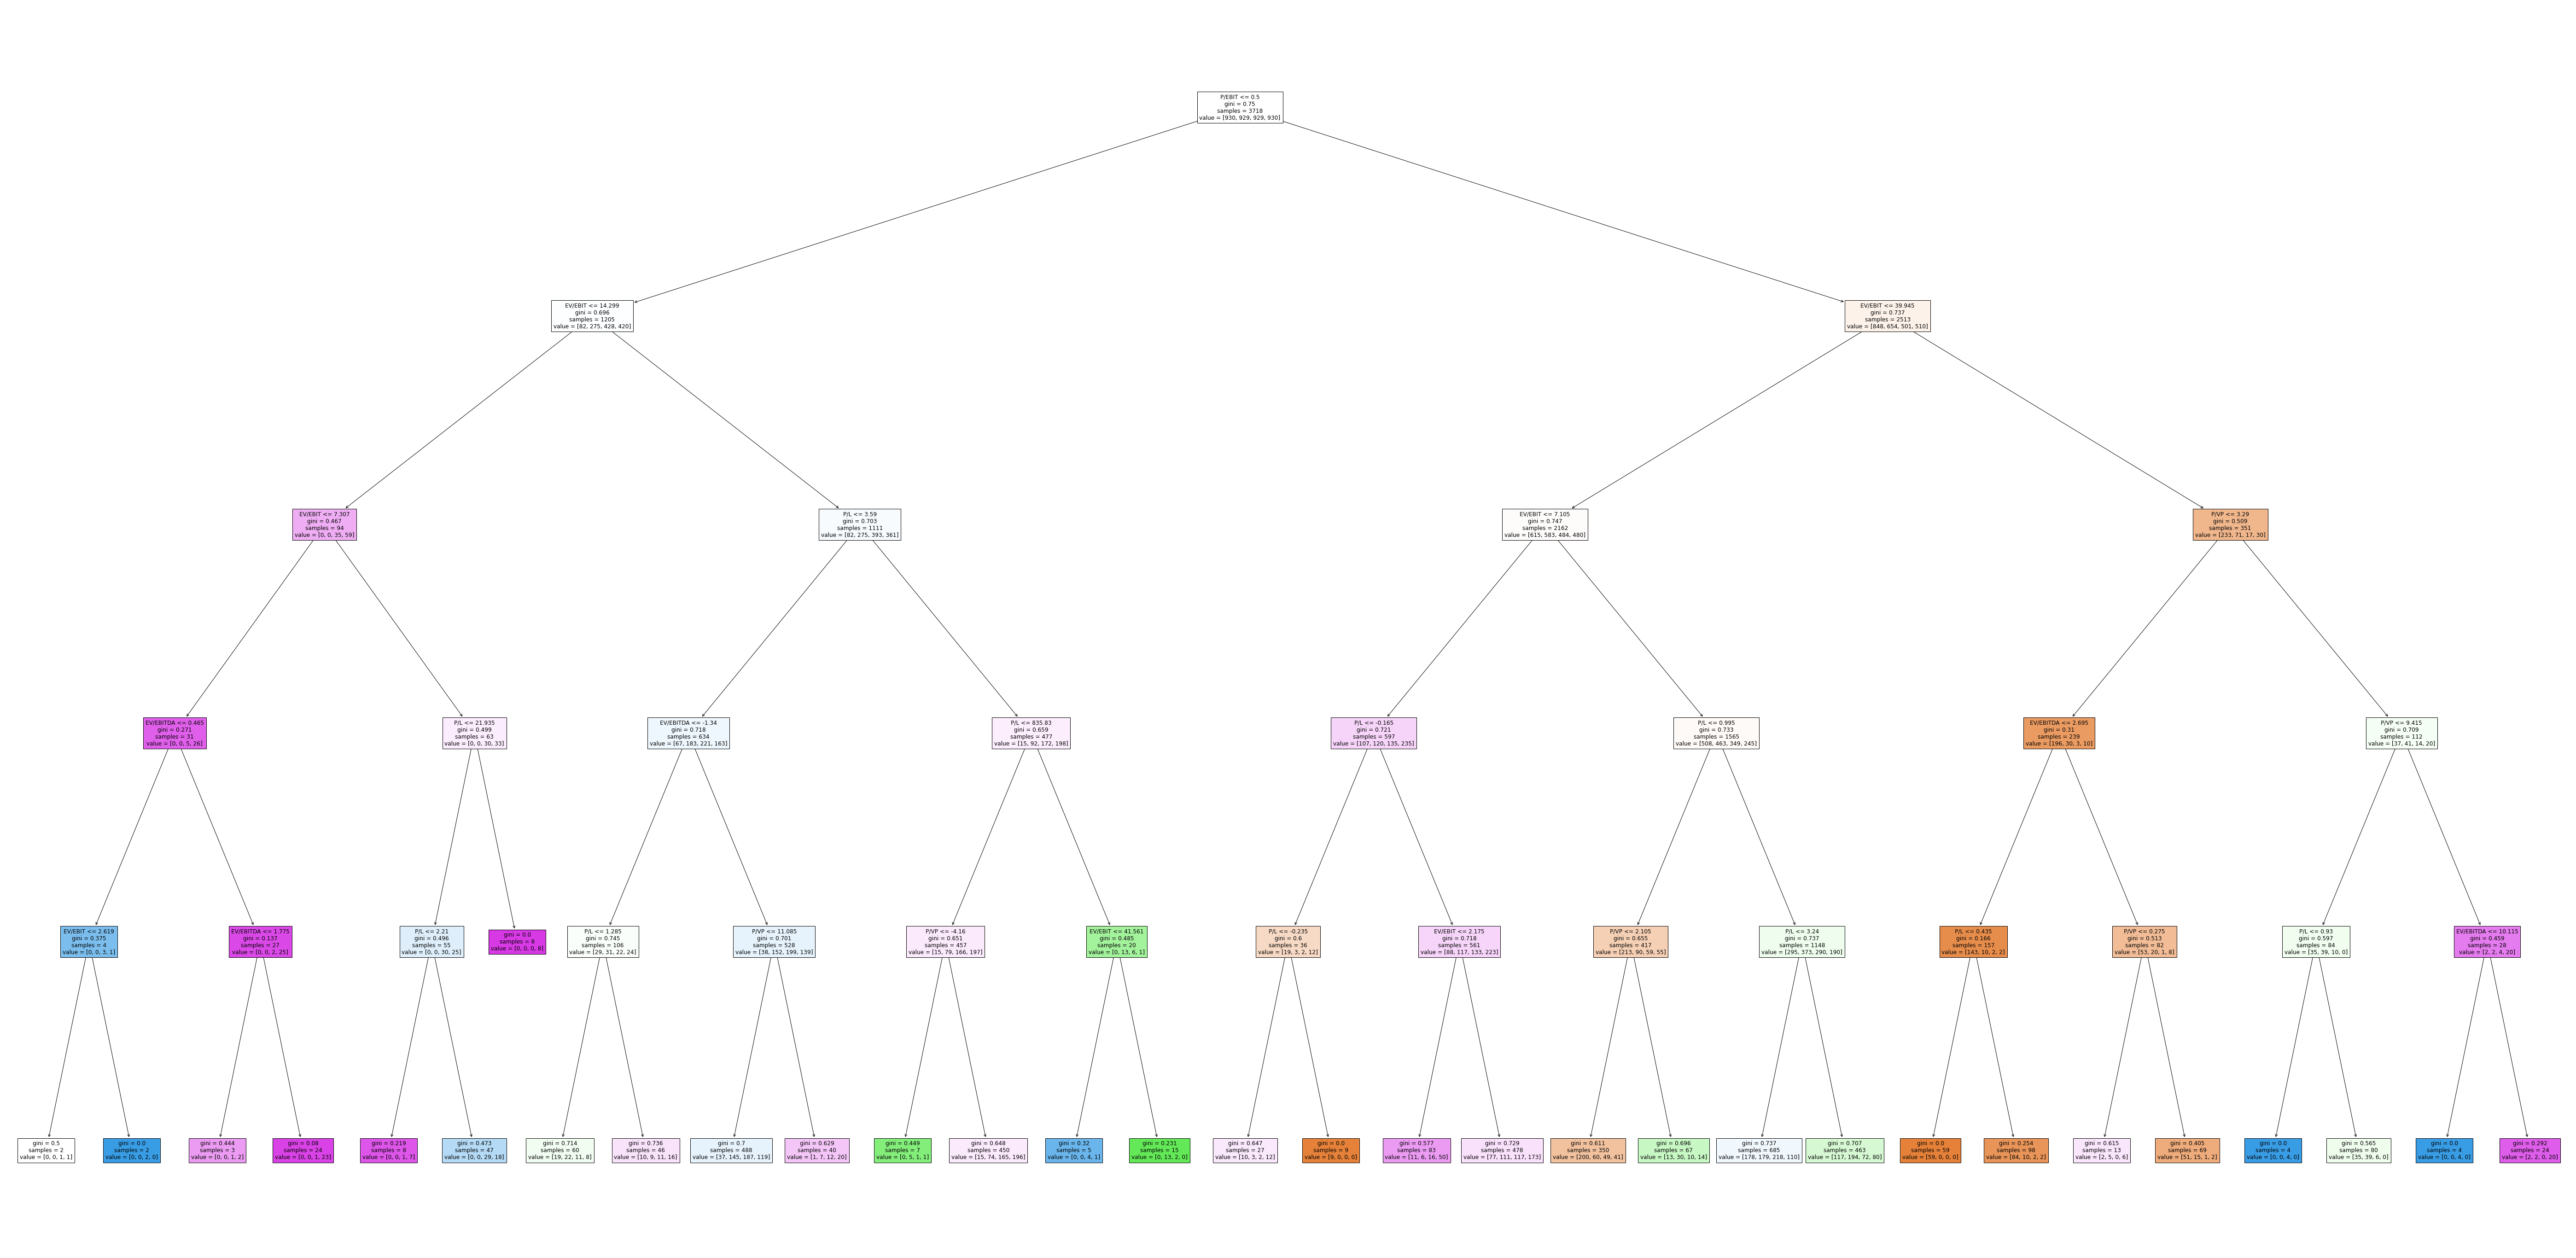

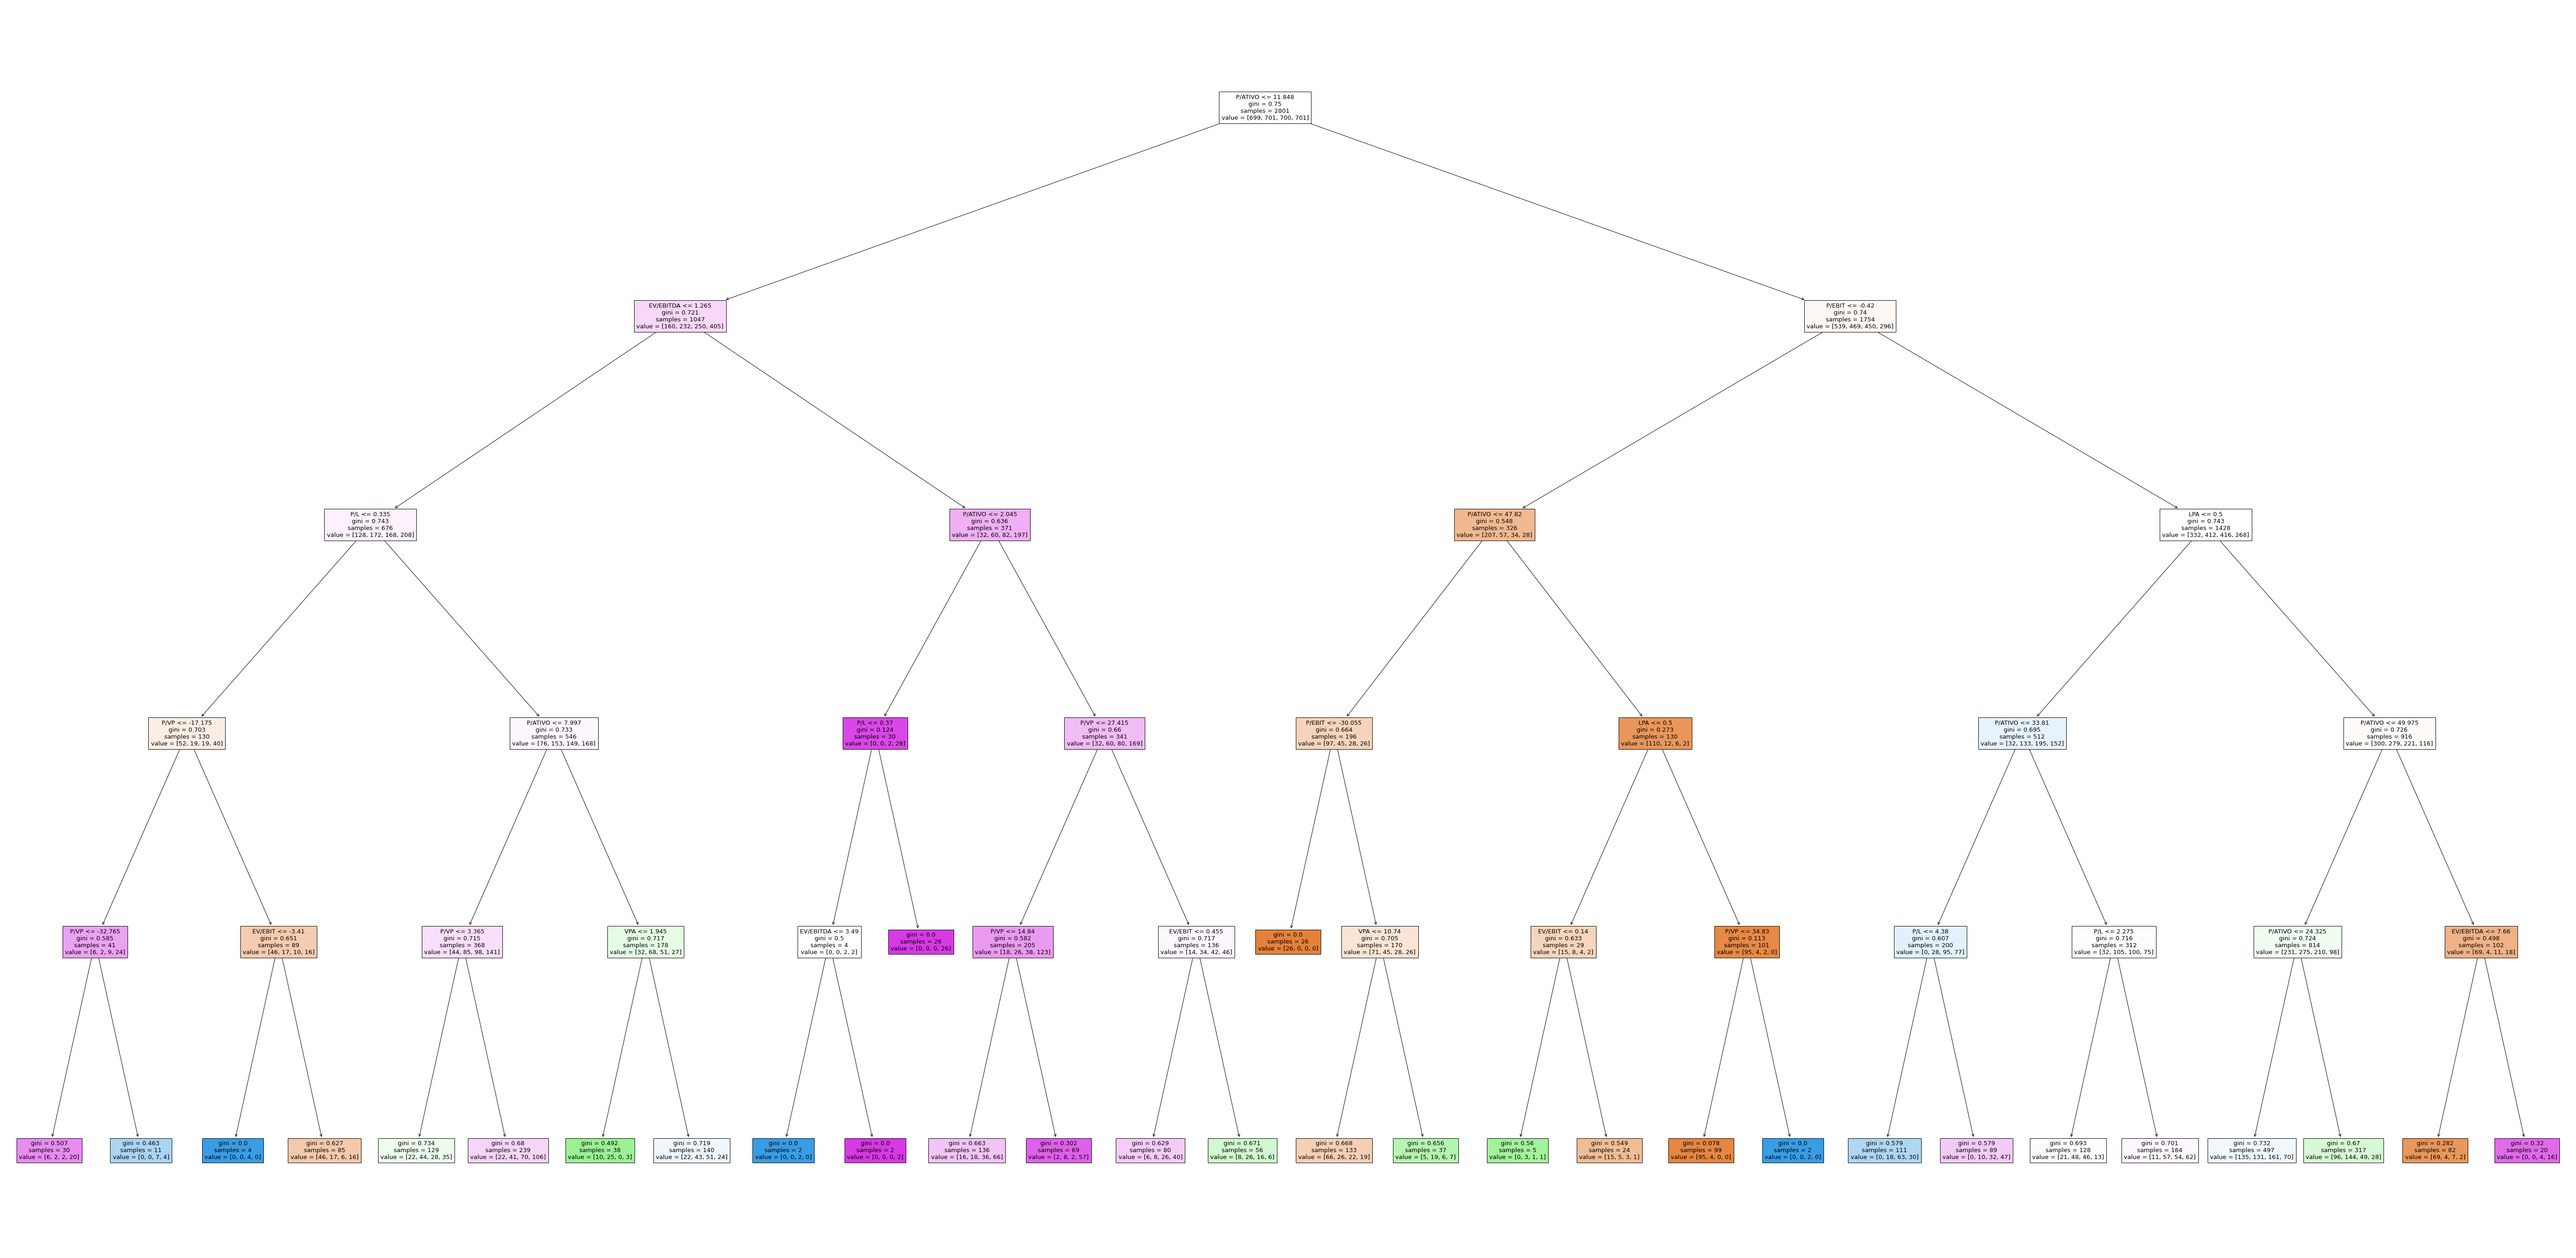

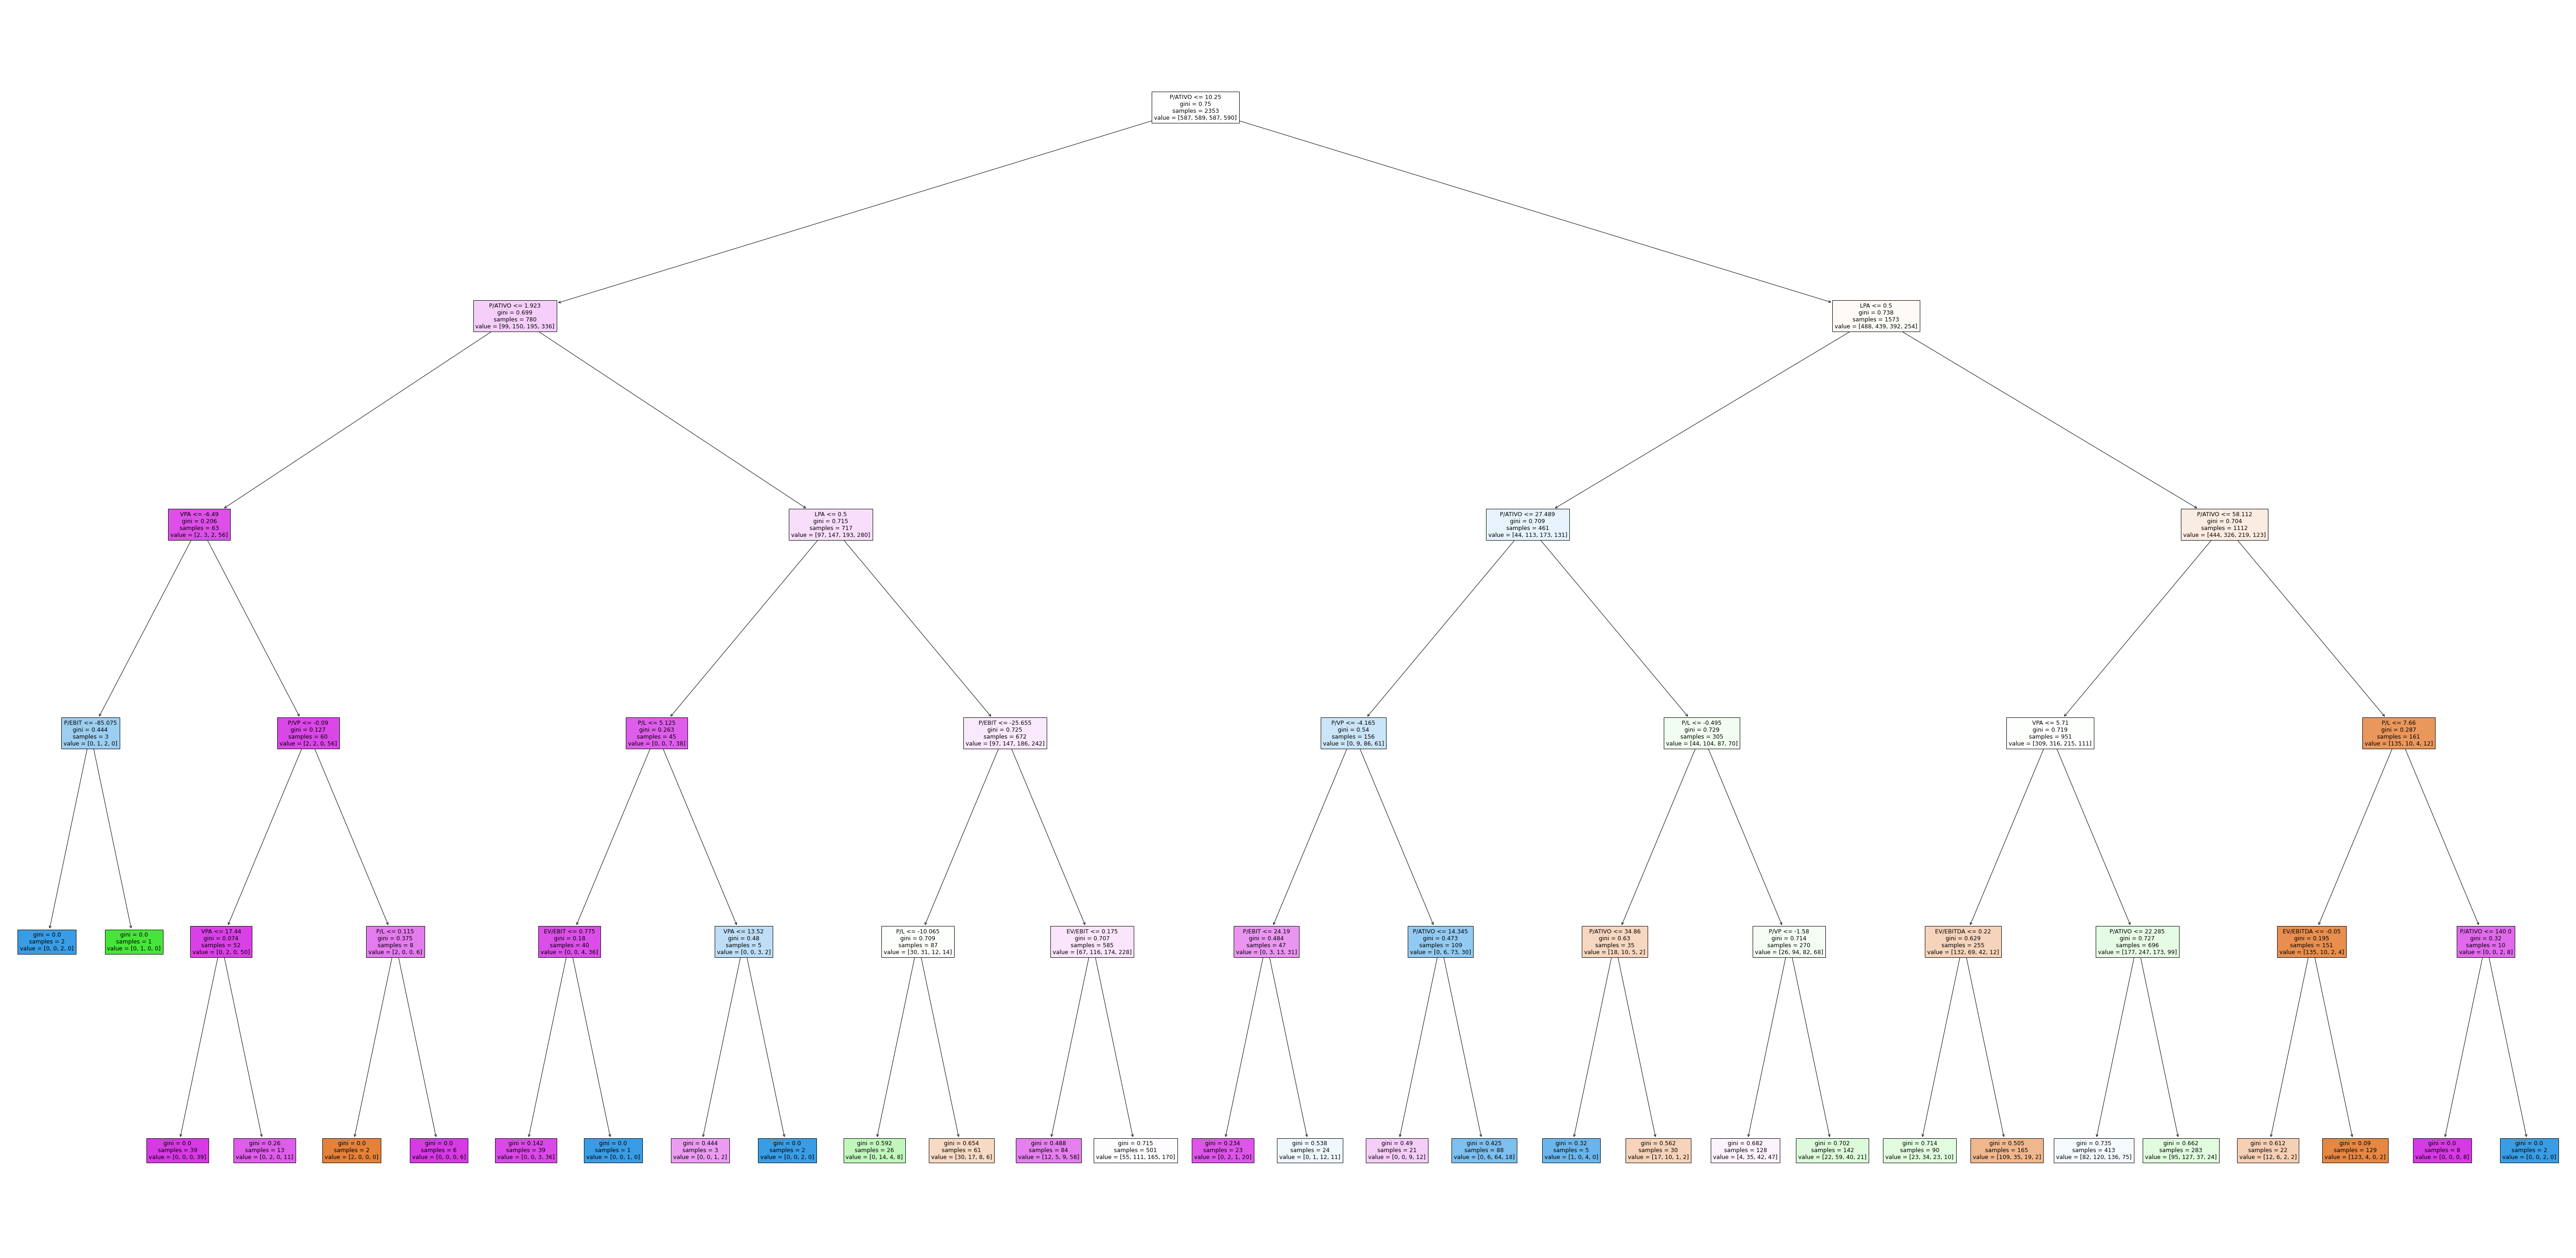

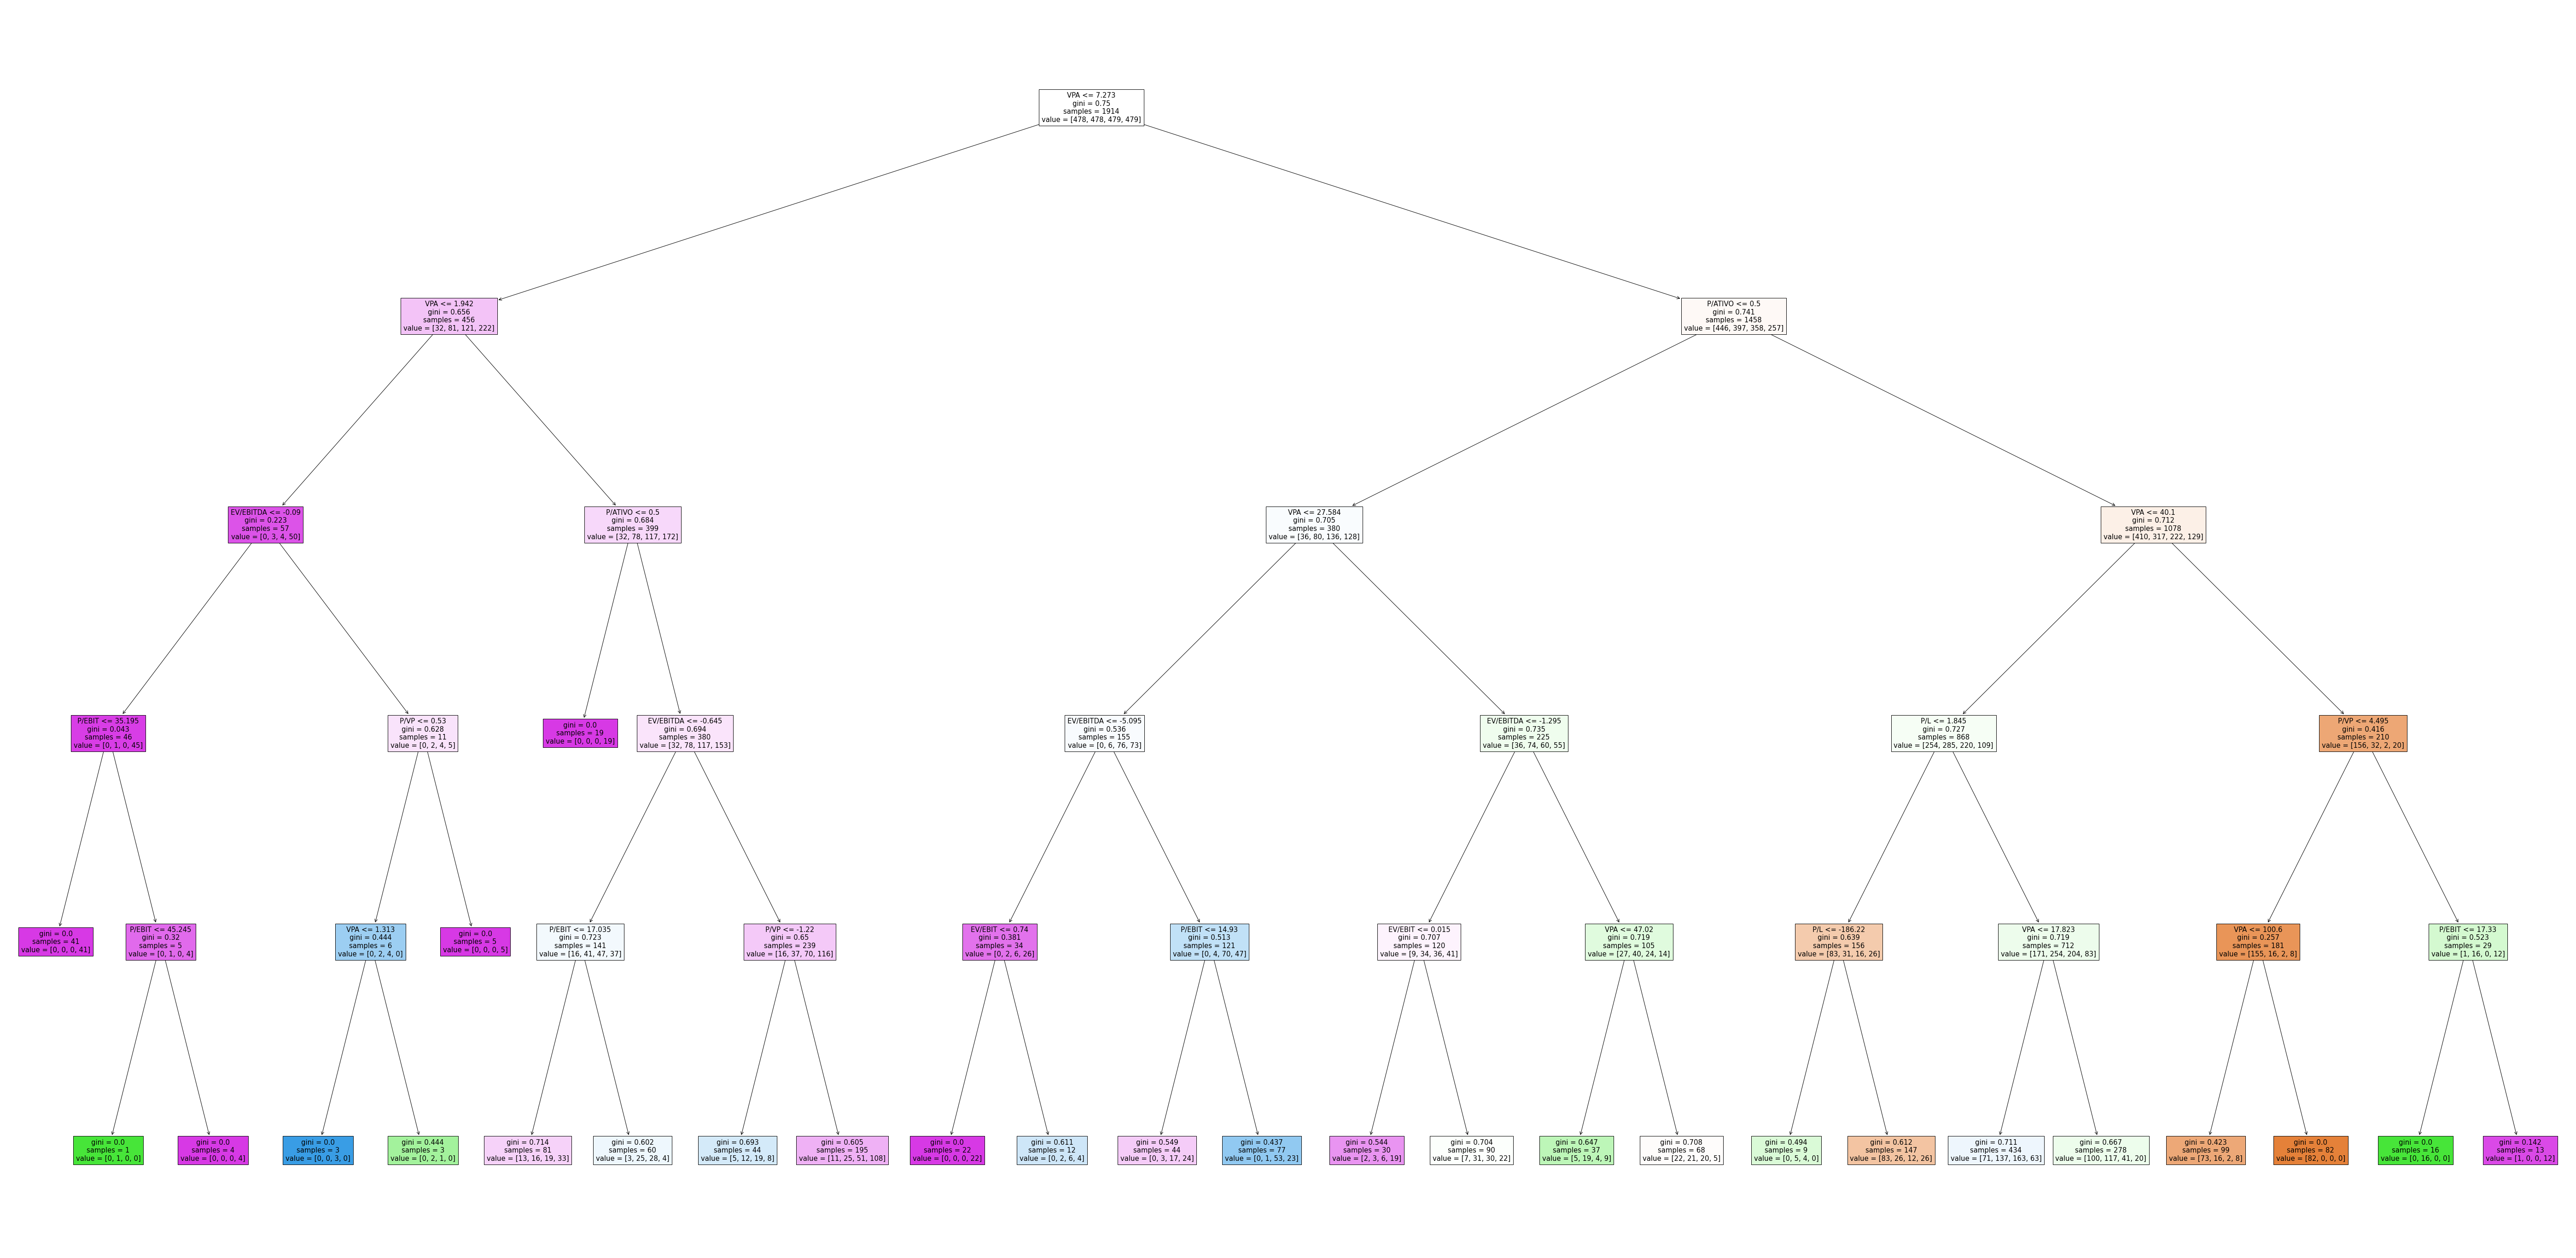

In [19]:
cv_result = []
reports = []
matrices = []
for i in range(1,6):
    x = dfs[i-1].drop('Open_dif_disc', axis=1)
    y = dfs[i-1]['Open_dif_disc']
    rfecv = RFECV(DecisionTreeClassifier(max_depth=5), min_features_to_select=5, cv=5)
    
    x_r = rfecv.fit_transform(x,y)
    
    cv_result.append(cross_validate(DecisionTreeClassifier(), x, y, scoring='accuracy', cv=5))
    
    tree = DecisionTreeClassifier(max_depth=5)
    tree.fit(x_r,y)
    
    fig = plt.figure(figsize=(100,50))
    _ = plot_tree(tree, 
                       feature_names=x.columns,  
                       filled=True)
    plt.savefig("Trees\\tree_{}.jpeg".format(i), bbox_inches='tight')
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    tree = DecisionTreeClassifier()
    tree.fit(x_train,y_train)
    y_pred = tree.predict(x_test)
    
    reports.append(classification_report(y_test, y_pred))
    matrices.append(confusion_matrix(y_test, y_pred))

In [20]:
cv_result

[{'fit_time': array([0.09699869, 0.09099841, 0.08702826, 0.09400225, 0.08796906]),
  'score_time': array([0.00200152, 0.00300241, 0.00199962, 0.00199819, 0.00200224]),
  'test_score': array([0.60776302, 0.64249234, 0.61287028, 0.65235174, 0.62678937])},
 {'fit_time': array([0.06501746, 0.0620153 , 0.06598854, 0.07099771, 0.06800103]),
  'score_time': array([0.00201225, 0.00199628, 0.00200033, 0.00200129, 0.00196362]),
  'test_score': array([0.68548387, 0.68548387, 0.66397849, 0.70928668, 0.67833109])},
 {'fit_time': array([0.04403639, 0.04500008, 0.04498982, 0.0459609 , 0.04603672]),
  'score_time': array([0.00200033, 0.00201011, 0.00200009, 0.00200224, 0.00100017]),
  'test_score': array([0.76292335, 0.74821429, 0.7375    , 0.75714286, 0.7125    ])},
 {'fit_time': array([0.0340004 , 0.03699827, 0.03399968, 0.03496099, 0.0360446 ]),
  'score_time': array([0.00102973, 0.00200081, 0.00200081, 0.002002  , 0.00099111]),
  'test_score': array([0.77494692, 0.78343949, 0.7537155 , 0.77021277,

In [21]:
i = 1
for report in reports:
    print("YEAR {}".format(i))
    print(report)
    i+=1

YEAR 1
              precision    recall  f1-score   support

         0.0       0.71      0.70      0.70       364
         1.0       0.56      0.65      0.60       344
         2.0       0.57      0.52      0.54       372
         3.0       0.60      0.55      0.57       388

    accuracy                           0.61      1468
   macro avg       0.61      0.61      0.61      1468
weighted avg       0.61      0.61      0.61      1468

YEAR 2
              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75       281
         1.0       0.58      0.67      0.63       276
         2.0       0.60      0.53      0.57       268
         3.0       0.66      0.63      0.65       291

    accuracy                           0.65      1116
   macro avg       0.65      0.65      0.65      1116
weighted avg       0.65      0.65      0.65      1116

YEAR 3
              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75       209


In [22]:
i = 1
for matrix in matrices:
    print("YEAR {}".format(i))
    print("0 | {}".format(matrix[0]))
    print("1 | {}".format(matrix[1]))
    print("2 | {}".format(matrix[2]))
    print("3 | {}\n".format(matrix[3]))
    i+=1

YEAR 1
0 | [256  48  34  26]
1 | [ 35 225  36  48]
2 | [ 30  76 194  72]
3 | [ 42  54  77 215]

YEAR 2
0 | [212  41  14  14]
1 | [ 23 186  34  33]
2 | [ 19  58 143  48]
3 | [ 27  33  47 184]

YEAR 3
0 | [155  26   8  20]
1 | [ 20 142  31  22]
2 | [ 19  32 124  30]
3 | [  9  12  42 149]

YEAR 4
0 | [130  20  13   2]
1 | [ 12 130  28  15]
2 | [ 11  29 112  28]
3 | [  5  16  23 132]

YEAR 5
0 | [127  15   6   6]
1 | [ 10 106  23   6]
2 | [ 10   6 102  26]
3 | [  2   5  19 106]

